In [1]:
import pandas as pd
dji = pd.read_csv('./data/DJI.csv')
UFO = pd.read_csv('./data/UFO.csv')

In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [2]:
dji.head()

,Date,Value
0,1941,110.96
1,1942,119.40
2,1943,135.89
3,1944,152.32
4,1945,192.91


In [3]:
#rename column
dji = dji.rename(columns={"Value": "DJI"})


In [4]:
UFO.head()

,Date,Value
0,1941,1
1,1942,2
2,1943,9
3,1944,9
4,1945,9


In [5]:
UFO = UFO.rename(columns={'Value': "UFO"})
UFO.head()

,Date,UFO
0,1941,1
1,1942,2
2,1943,9
3,1944,9
4,1945,9


In [6]:
#join the data

stocks_and_ufo = dji.merge(UFO,how='inner',on ='Date')

In [7]:
stocks_and_ufo

,Date,DJI,UFO
0,1941,110.96,1
1,1942,119.40,2
2,1943,135.89,9
3,1944,152.32,9
4,1945,192.91,9
...,...,...,...
68,2009,10428.05,4541
69,2010,11577.51,4283
70,2011,12217.56,5107
71,2012,13104.14,7357


In [8]:
stocks_and_ufo = stocks_and_ufo.set_index('Date')

In [9]:
stocks_and_ufo

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9
...,...,...
2009,10428.05,4541
2010,11577.51,4283
2011,12217.56,5107


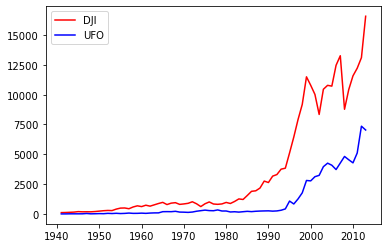

In [14]:
#plot Dow Jones Data
plt.plot(stocks_and_ufo['DJI'], color = 'red', label = 'DJI')
#plot UFO
plt.plot(stocks_and_ufo['UFO'], color = 'blue', label = 'UFO')
plt.legend()
plt.show()

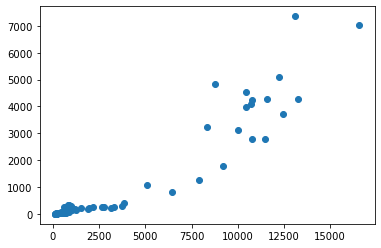

In [15]:
#scatter plot

plt.scatter(stocks_and_ufo['DJI'], stocks_and_ufo['UFO'])
plt.show()

<AxesSubplot:xlabel='Date'>

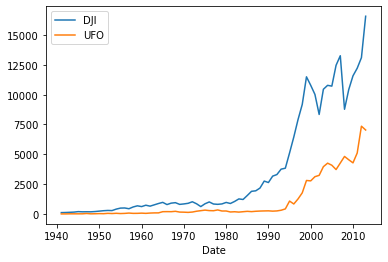

In [16]:
stocks_and_ufo[['DJI','UFO']].plot()

In [17]:
#compute the correlation 

correlation1 = stocks_and_ufo['DJI'].corr(stocks_and_ufo['UFO'])
print('Correlation:', correlation1)

Correlation: 0.9399762210726432


In [18]:
#compute the correlation of percent changes
# This is more important in Business insights

stocks_and_ufo['DJI_per'] = stocks_and_ufo['DJI'].pct_change()
stocks_and_ufo

,DJI,UFO,DJI_per
Date,,,
1941,110.96,1,NaN
1942,119.40,2,0.076063
1943,135.89,9,0.138107
1944,152.32,9,0.120907
1945,192.91,9,0.266478
...,...,...,...
2009,10428.05,4541,0.188194
2010,11577.51,4283,0.110228
2011,12217.56,5107,0.055284


In [19]:
stocks_and_ufo['UFO_per'] = stocks_and_ufo['UFO'].pct_change()
stocks_and_ufo

,DJI,UFO,DJI_per,UFO_per
Date,,,,
1941,110.96,1,NaN,NaN
1942,119.40,2,0.076063,1.000000
1943,135.89,9,0.138107,3.500000
1944,152.32,9,0.120907,0.000000
1945,192.91,9,0.266478,0.000000
...,...,...,...,...
2009,10428.05,4541,0.188194,-0.057884
2010,11577.51,4283,0.110228,-0.056816
2011,12217.56,5107,0.055284,0.192389


In [20]:
correlation2 = stocks_and_ufo['DJI_per'].corr(stocks_and_ufo['UFO_per'])
print('Correlation of percentage change:', correlation2)

Correlation of percentage change: 0.06026935462405376


In [22]:
x = pd.read_csv('./data/AMZN.csv')
y = pd.read_csv('./data/MSFT.csv')

In [23]:
x.head()

,Date,Adj Close
0,5/15/1997,1.958333
1,5/16/1997,1.729167
2,5/19/1997,1.708333
3,5/20/1997,1.635417
4,5/21/1997,1.427083


In [24]:
y.head()

,Date,Adj Close
0,8/6/2012,26.107651
1,8/7/2012,26.377876
2,8/8/2012,26.438896
3,8/9/2012,26.587088
4,8/10/2012,26.517351


In [25]:
x.shape

(5088, 2)

In [26]:
y.shape

(1258, 2)

In [27]:
x = x.rename(columns = {'Adj Close': 'AMZN'})
y = y.rename(columns = {'Adj Close': 'MSFT'})
x.head()


,Date,AMZN
0,5/15/1997,1.958333
1,5/16/1997,1.729167
2,5/19/1997,1.708333
3,5/20/1997,1.635417
4,5/21/1997,1.427083


In [28]:
df = x.merge(y, how='inner', on = 'Date')
df

,Date,AMZN,MSFT
0,8/6/2012,233.990005,26.107651
1,8/7/2012,236.559998,26.377876
2,8/8/2012,234.380005,26.438896
3,8/9/2012,234.059998,26.587088
4,8/10/2012,232.750000,26.517351
...,...,...,...
1251,7/27/2017,1046.000000,73.160004
1252,7/28/2017,1020.039978,73.040001
1253,7/31/2017,987.780029,72.699997
1254,8/1/2017,996.190002,72.580002


In [29]:
df = df.set_index('Date')
df

,AMZN,MSFT
Date,,
8/6/2012,233.990005,26.107651
8/7/2012,236.559998,26.377876
8/8/2012,234.380005,26.438896
8/9/2012,234.059998,26.587088
8/10/2012,232.750000,26.517351
...,...,...
7/27/2017,1046.000000,73.160004
7/28/2017,1020.039978,73.040001
7/31/2017,987.780029,72.699997


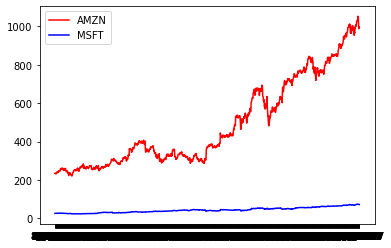

In [30]:
plt.plot(df['AMZN'], color = 'red',label = 'AMZN')
plt.plot(df['MSFT'],color='blue',label='MSFT')
plt.legend()
plt.show()

In [32]:
correlation3 = df['AMZN'].corr(df['MSFT'])
print(correlation3)

0.9378022710788252


In [33]:
df['AMZN_per'] = df['AMZN'].pct_change()
df['MSFT_per'] = df['MSFT'].pct_change()
df.head()

,AMZN,MSFT,AMZN_per,MSFT_per
Date,,,,
8/6/2012,233.990005,26.107651,NaN,NaN
8/7/2012,236.559998,26.377876,0.010983,0.010350
8/8/2012,234.380005,26.438896,-0.009215,0.002313
8/9/2012,234.059998,26.587088,-0.001365,0.005605
8/10/2012,232.750000,26.517351,-0.005597,-0.002623


In [34]:
correlation4 = df['AMZN_per'].corr(df['MSFT_per'])
print(correlation4)

0.37790976628577627


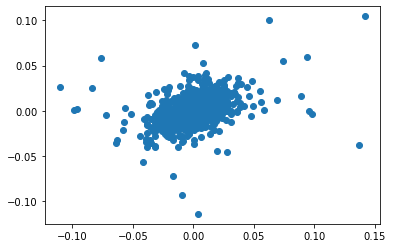

In [35]:
plt.scatter(df['AMZN_per'],df['MSFT_per'])

In [36]:
import statsmodels.api as sm

In [37]:
df = df.dropna()

In [38]:
df

,AMZN,MSFT,AMZN_per,MSFT_per
Date,,,,
8/7/2012,236.559998,26.377876,0.010983,0.010350
8/8/2012,234.380005,26.438896,-0.009215,0.002313
8/9/2012,234.059998,26.587088,-0.001365,0.005605
8/10/2012,232.750000,26.517351,-0.005597,-0.002623
8/13/2012,232.440002,26.491201,-0.001332,-0.000986
...,...,...,...,...
7/27/2017,1046.000000,73.160004,-0.006459,-0.012019
7/28/2017,1020.039978,73.040001,-0.024818,-0.001640
7/31/2017,987.780029,72.699997,-0.031626,-0.004655


In [39]:
df = sm.add_constant(df)

In [40]:
df

,const,AMZN,MSFT,AMZN_per,MSFT_per
Date,,,,,
8/7/2012,1.0,236.559998,26.377876,0.010983,0.010350
8/8/2012,1.0,234.380005,26.438896,-0.009215,0.002313
8/9/2012,1.0,234.059998,26.587088,-0.001365,0.005605
8/10/2012,1.0,232.750000,26.517351,-0.005597,-0.002623
8/13/2012,1.0,232.440002,26.491201,-0.001332,-0.000986
...,...,...,...,...,...
7/27/2017,1.0,1046.000000,73.160004,-0.006459,-0.012019
7/28/2017,1.0,1020.039978,73.040001,-0.024818,-0.001640
7/31/2017,1.0,987.780029,72.699997,-0.031626,-0.004655


In [41]:
result = sm.OLS(df['MSFT_per'],df[['const','AMZN_per']]).fit()
result

In [43]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MSFT_per   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           6.99e-44
Time:                        16:43:06   Log-Likelihood:                 3656.5
No. Observations:                1255   AIC:                            -7309.
Df Residuals:                    1253   BIC:                            -7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.410      0.1

In [44]:
intercept = result.params[0]
print(intercept)
slope = result.params[1]
print(slope)

0.0005247197315760153
0.2932977404516053


In [45]:
#square root of R-square
np.sqrt(0.143)

0.3781534080237807